<a href="https://colab.research.google.com/github/Karlajack/MachineLearning1/blob/main/Capstone_Project_Taiwainese_bankruptcy_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taiwainese companies bankruptcy prediction

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

The prediction is bases on company financial rations from financial/accounts statements that shows the company posistions in terms of profitability,liquidity and net value.



In [1]:
# Impoting general libraries
import warnings
import itertools
import random
from scipy.stats import uniform

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Class Imbalance
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,mean_squared_error,r2_score

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
# importing the data

data=pd.read_csv('/content/Taiwainese bankrupcy prediction.csv')


data.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [3]:
# Renaming Bankrupt column

data.rename(columns = {'Bankrupt?': 'class'}, inplace = True)


# EDA and Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Class                                                     6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.shape

(6819, 96)

In [ ]:
data.describe()

,Class,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


**Exploring Missingness**



In [ ]:
data.isnull().sum().sort_values(ascending=False)

Class                                                       0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

#### Insights from  Data Analysis:
- No missing values
- All features are continous variables
- Class(Bankrupt) is a discrete variable (classification problem)

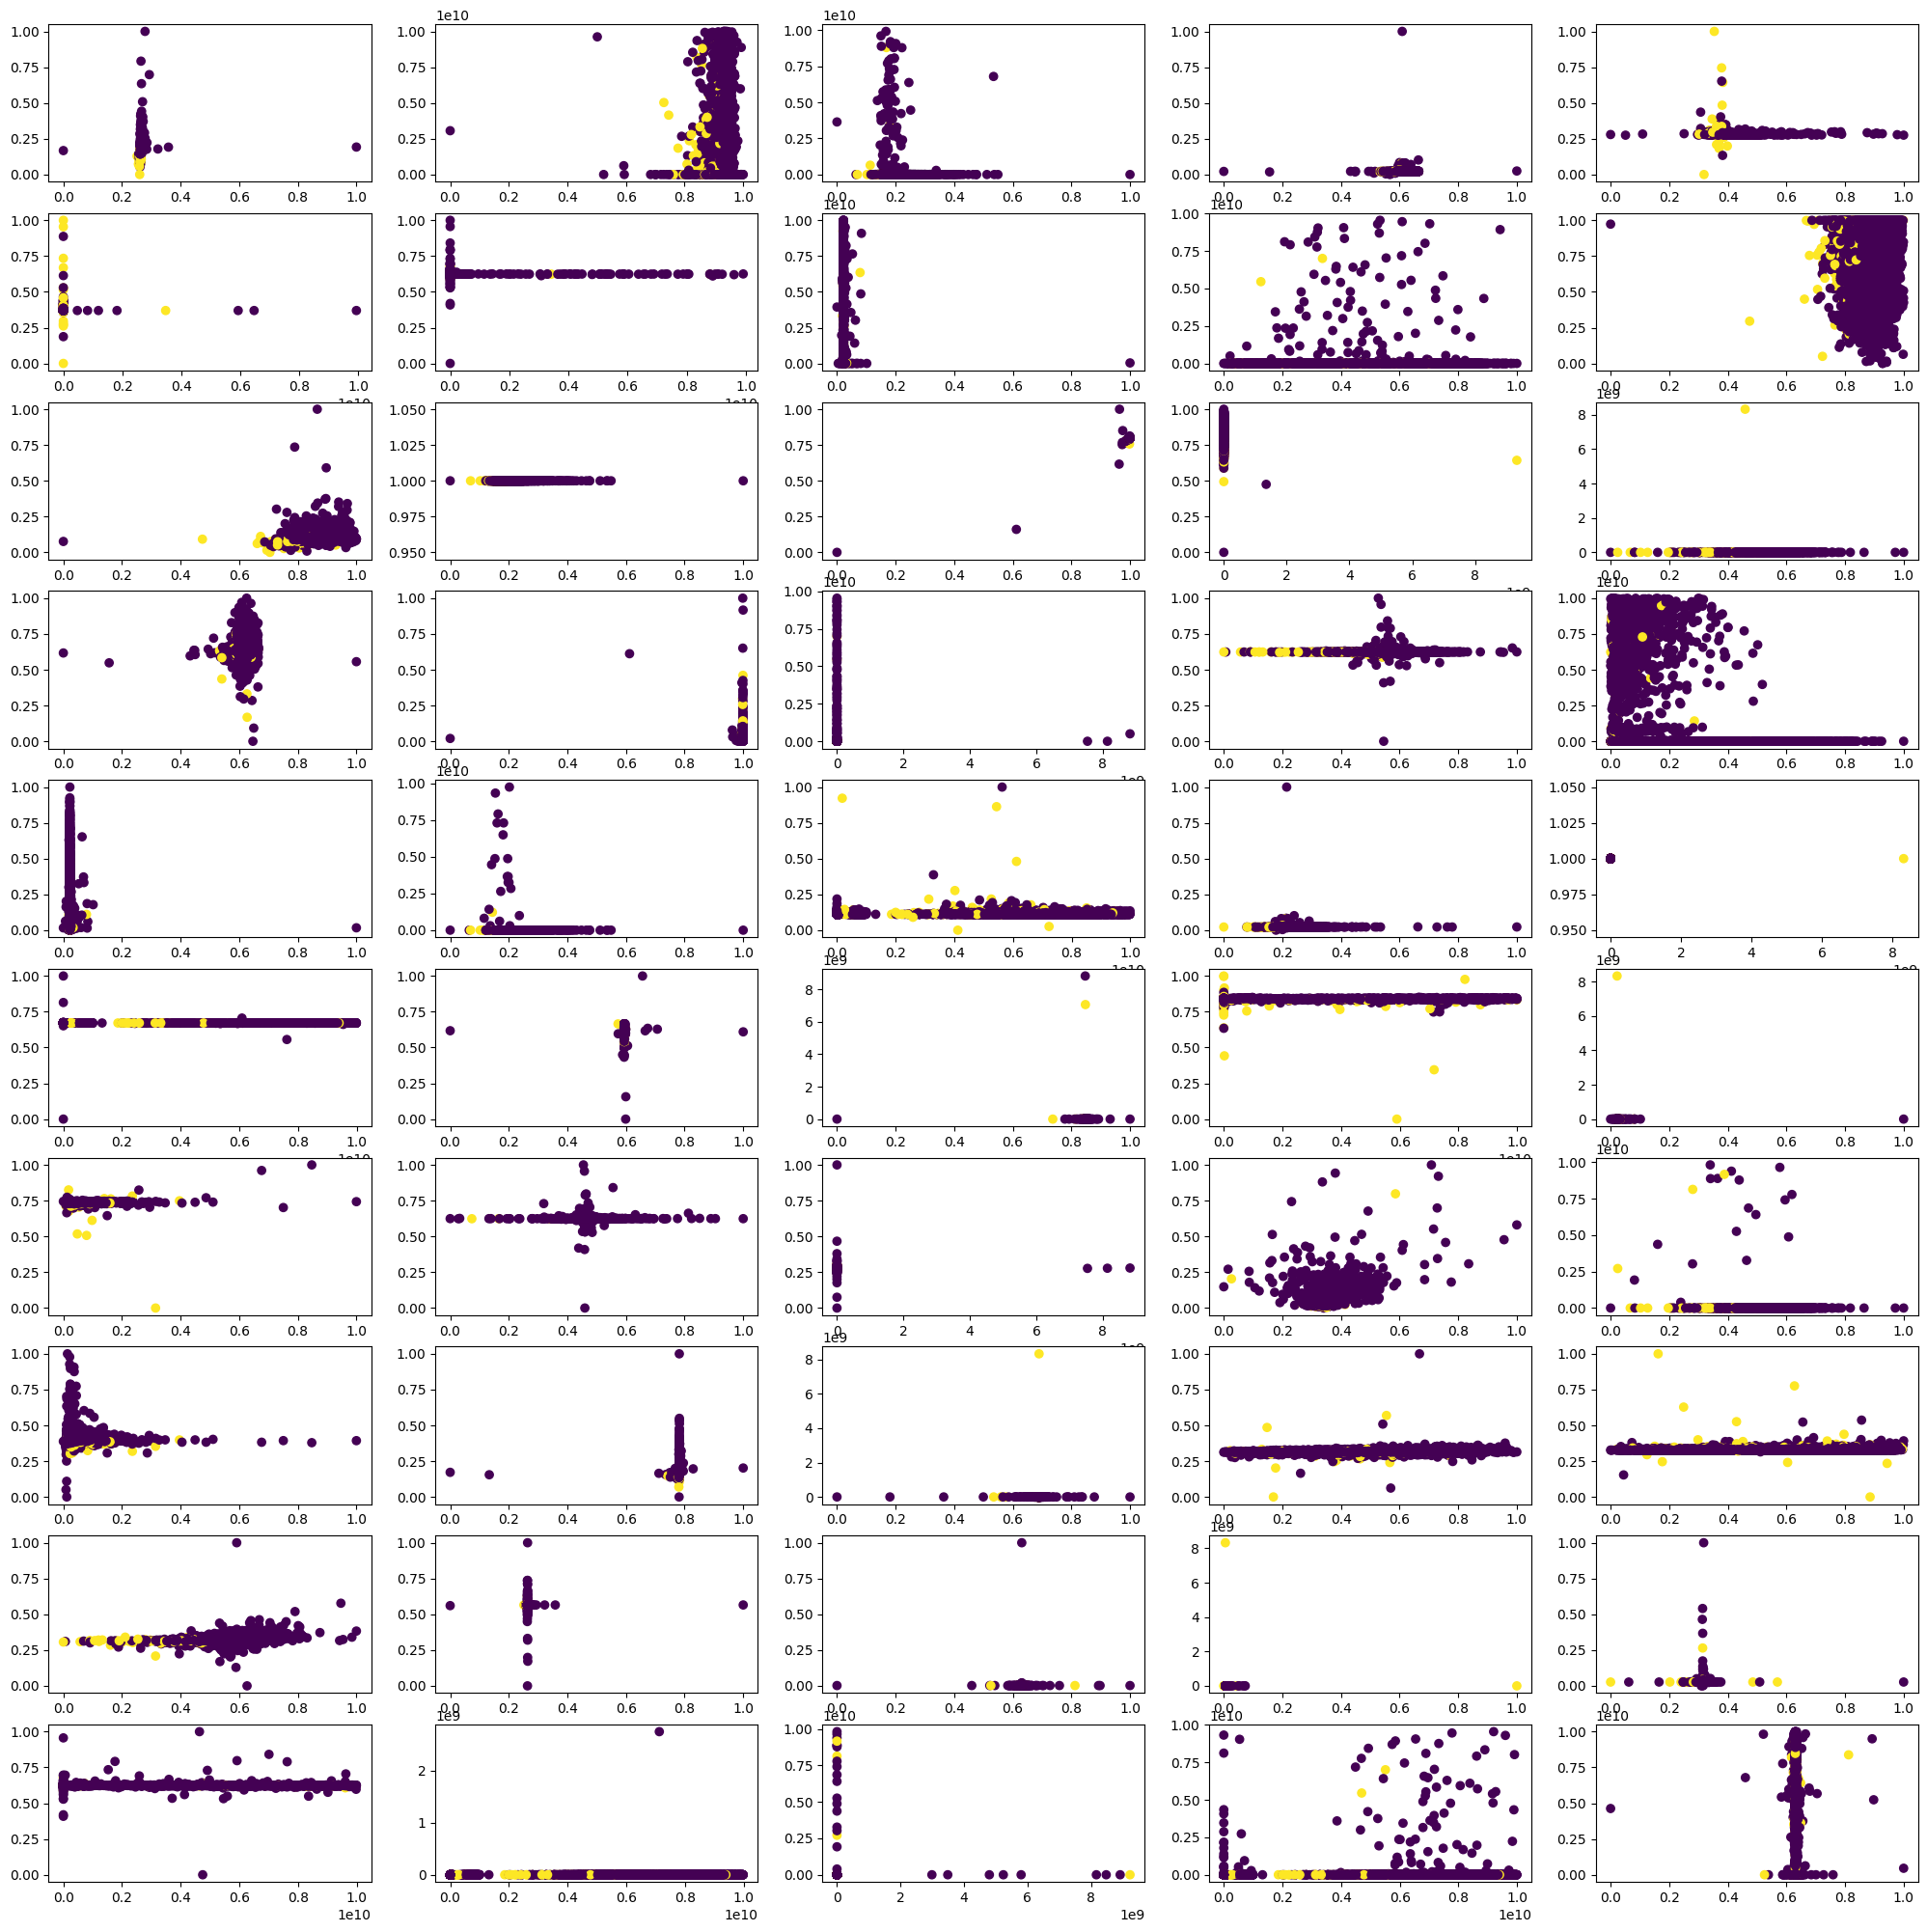

In [ ]:
## Check for linear separability-Use Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2))
rand = random.choices(comb, k=50)

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.Class)

In [ ]:
corr_df=data.corr()
corr_df.head(2)


,Class,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Class,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416


In [ ]:
# Those with high correlation with bankruptcy
cols=corr_df.nlargest(10,'Class')['Class'].index
cols

Index(['Class', ' Debt ratio %', ' Current Liability to Assets',
       ' Borrowing dependency', ' Current Liability to Current Assets',
       ' Liability to Equity', ' Current Liabilities/Equity',
       ' Current Liability to Equity', ' Liability-Assets Flag',
       ' Total expense/Assets'],
      dtype='object')

<Axes: >

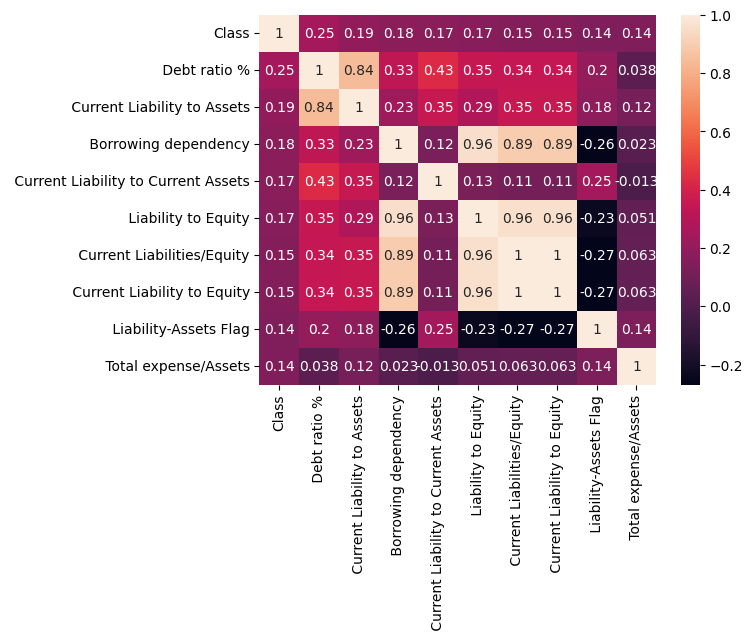

In [ ]:
corrmap=np.corrcoef(data[cols].values.T)
sns.heatmap(corrmap,annot=True,xticklabels=cols.values,yticklabels=cols.values)

### Insights
-Majority of the variables have non linear relatioships

Sector Vector and  Random Forest models will work best in this scnerio.


ValueError: num must be an integer with 1 <= num <= 50, not 51

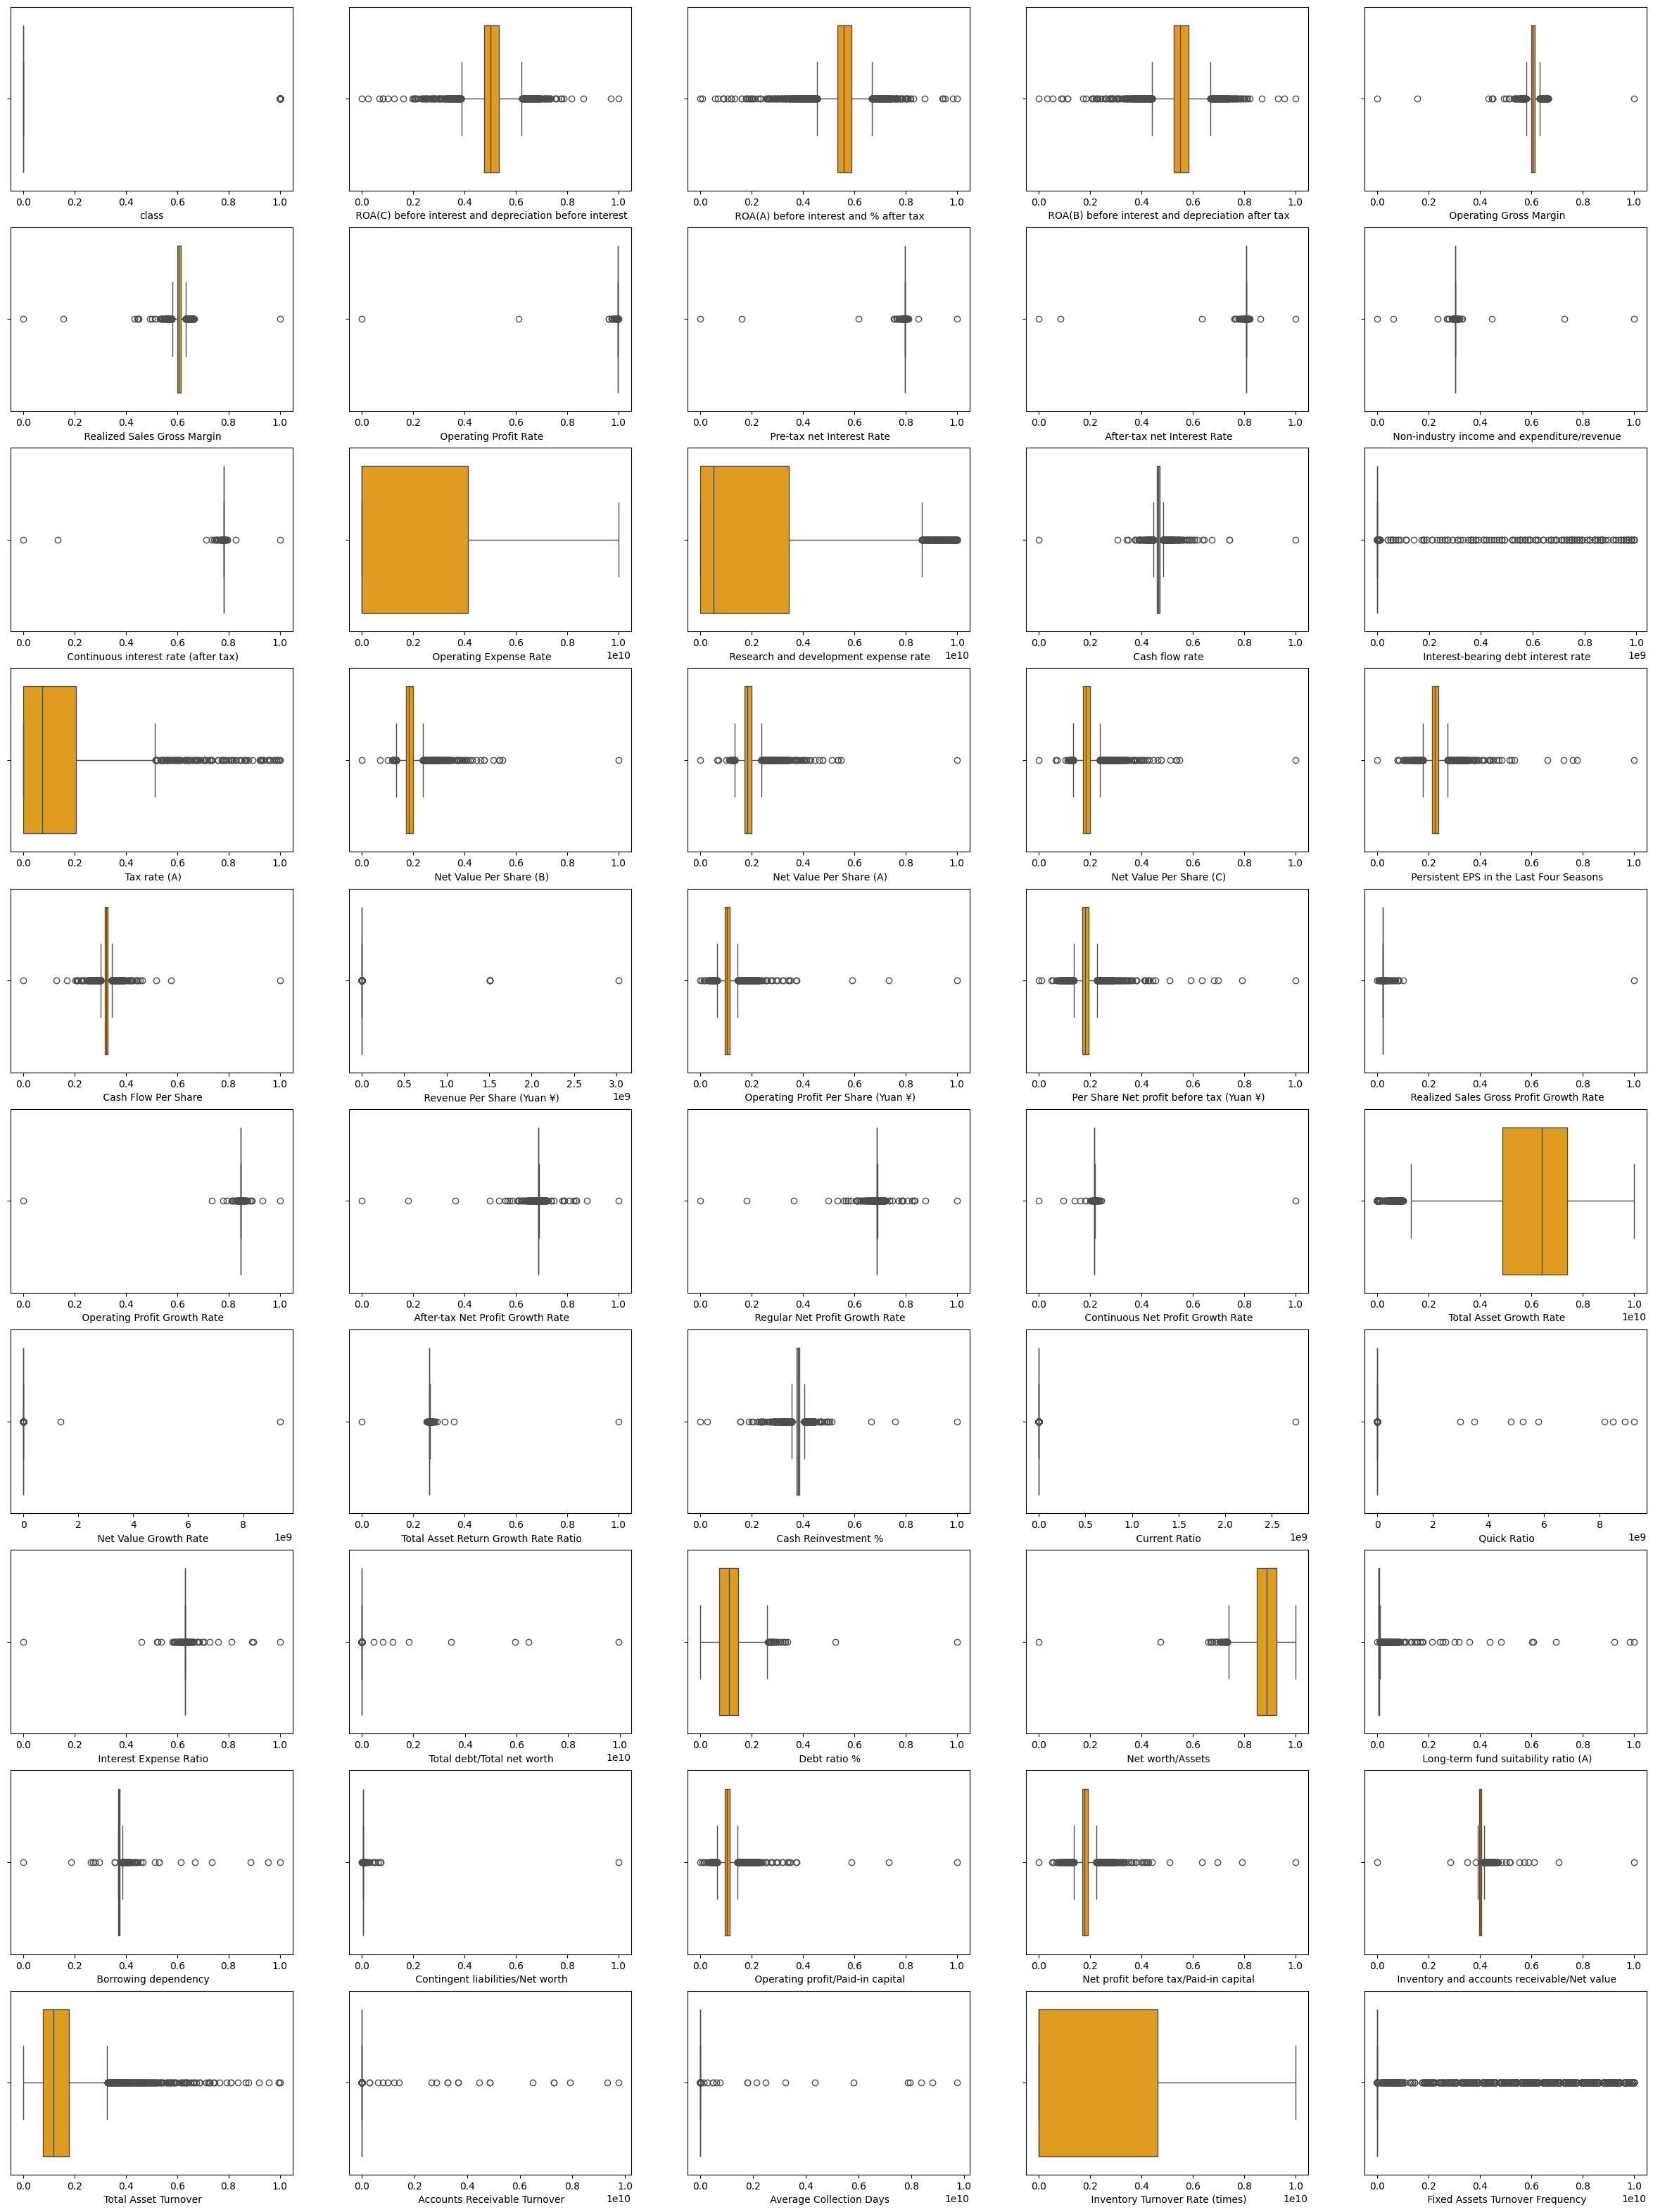

In [ ]:
## Check for outliers using Unitvariate analysis of  variables
fig = plt.figure(figsize=(30,40))
for i,j in zip(data.columns,range(len(data.columns))):
    if i!='Class':
        ax = fig.add_subplot(10,5, j+1)
        sns.boxplot(data=data,x=data[i],orient='v',color="Orange")

### Insights from Exploratory Data Analysis:
1. Most of the variables have outliers
2. Tree-based models are the best for this type of  data e.g AdaBoost,Gradient Boosting,XGboosting etc


**Class IMbalance**

In [4]:
X=data.drop(['class'],axis=1)
y=data[["class"]]

array([[<Axes: title={'center': 'Class'}>]], dtype=object)

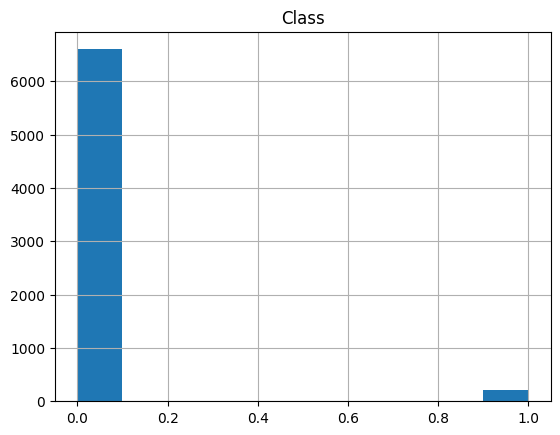

In [ ]:
y.hist()

array([[<Axes: title={'center': 'class'}>]], dtype=object)

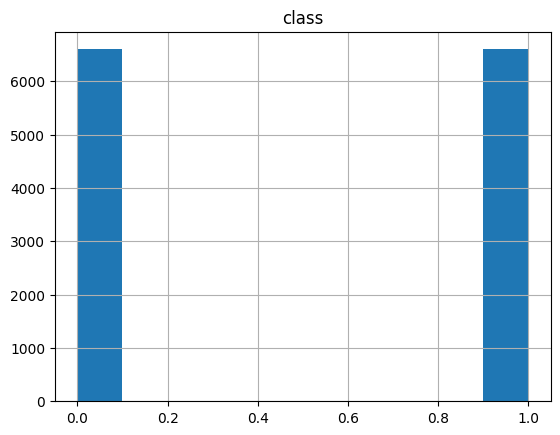

In [5]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(X,y)
#Ploting classes
y_res.hist()

With SMOTE we get a feature space with a similar distribution to the original data set, except that we have balanced ratio of the negative and positive examples. Thus our model should be able to learn the patterns associated with both bankruptcy and non-bankruptcy. we are interested in both an increase in precision and recall.


In [6]:
print(x_res.shape,y_res.shape)

(13198, 95) (13198, 1)


# Modelling

**Model data preparation**

In [7]:
x=x_res
y=y_res

In [8]:
# Model Data Preparation
X = data.drop('class',axis=1)
y = data['class']

In [9]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4773, 95) (2046, 95) (4773,) (2046,)


**Hyperparameter Tuning**

**Random Search CV**

In [11]:
# # define the group of parameters to tune
model = RandomForestClassifier()
n_estimators =[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_depth=[int(x) for x in np.linspace(start=1,stop=25,num=5)]
max_features=[int(x) for x in np.linspace(start=5,stop=30,num=5)]

# set the Random search cv object
search_space ={
    "n_estimators" : n_estimators,
    'max_depth' :max_depth,
    'max_features':max_features,
    'criterion':['gini','entropy']}

clf = RandomizedSearchCV(model,search_space,n_iter=2,cv=5,scoring='accuracy',random_state=1)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
clf.best_params_

{'n_estimators': 600, 'max_features': 23, 'max_depth': 25, 'criterion': 'gini'}

In [12]:
# Fit randomforest model with the best params
pipe = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=600,max_depth=25,max_features=23,criterion='gini'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97068063 0.96649215 0.97382199 0.97169811 0.96226415] 0.9689914057097699


In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=25, max_features=23,
                                        n_estimators=600))])

In [19]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           1       0.57      0.14      0.23        57
           0       0.98      1.00      0.99      1989

    accuracy                           0.97      2046
   macro avg       0.77      0.57      0.61      2046
weighted avg       0.96      0.97      0.97      2046

Confusion matrix, without normalization
[[   8   49]
 [   6 1983]]


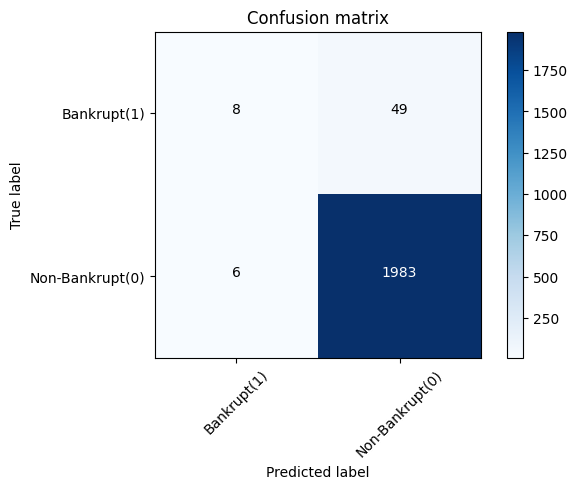

In [23]:
# Use the confusion matrix to visualize the precision and recall for balanced dataset
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])


print (classification_report(y_test, y_pred, labels=[1,0]))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bankrupt(1)','Non-Bankrupt(0)'],normalize=False,
                      title='Confusion matrix')
plt.show()

In [24]:
de=pd.DataFrame(X_test,columns=data.columns)

In [25]:
de['y_test']=y_test
de['y_pred']=y_pred

In [26]:
de.head()

,class,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,y_test,y_pred
2359,NaN,0.508019,0.582806,0.564698,0.613716,0.613716,0.999204,0.797655,0.809565,0.303496,...,0.621430,0.613713,0.843953,0.290217,0.026905,0.565648,1,0.016463,0,0
6231,NaN,0.434115,0.480757,0.475882,0.598719,0.598719,0.998894,0.797257,0.809180,0.303449,...,0.623950,0.598717,0.837991,0.277442,0.026731,0.564856,1,0.045295,0,0
1840,NaN,0.479062,0.518426,0.526527,0.608585,0.608585,0.998927,0.797343,0.809277,0.303530,...,0.623902,0.608586,0.839500,0.277886,0.026728,0.564841,1,0.040435,0,0
6688,NaN,0.555648,0.633668,0.617164,0.615165,0.615165,0.999126,0.797568,0.809484,0.303509,...,0.623831,0.615163,0.844734,0.281997,0.026829,0.565332,1,0.023464,0,0
1825,NaN,0.462926,0.506705,0.506183,0.607129,0.607129,0.998956,0.797334,0.809245,0.303454,...,0.623866,0.607128,0.839229,0.275884,0.026791,0.565158,1,0.090751,0,0


In [28]:
de[['y_test','y_pred']]


,y_test,y_pred
2359,0,0
6231,0,0
1840,0,0
6688,0,0
1825,0,0
...,...,...
1968,0,0
2789,0,0
6796,0,0
6373,0,0


In [34]:
columns = de.columns

In [ ]:
for i in columns:


In [31]:
de[de['y_test'] != de['y_pred']].head()


,class,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,y_test,y_pred
2026,NaN,0.386584,0.463966,0.452594,0.598820,0.598820,0.998926,0.797248,0.809209,0.303366,...,0.623683,0.598815,0.832155,0.292023,0.026649,0.564374,1,0.015814,1,0
1695,NaN,0.382928,0.421446,0.422078,0.601745,0.601745,0.998962,0.797178,0.809123,0.303168,...,0.623383,0.601745,0.822334,0.301873,0.026649,0.564375,1,0.013792,0,1
184,NaN,0.454346,0.513792,0.506023,0.597522,0.597522,0.998899,0.797237,0.809064,0.303405,...,0.621979,0.597522,0.837544,0.283088,0.026463,0.562888,1,0.021747,1,0
4787,NaN,0.455809,0.493404,0.504684,0.596600,0.596600,0.998944,0.797233,0.809159,0.303303,...,0.624292,0.596599,0.836180,0.286815,0.026529,0.563492,1,0.018210,1,0
2023,NaN,0.497489,0.532109,0.552278,0.601962,0.601962,0.998987,0.797371,0.809294,0.303454,...,0.623577,0.601960,0.839835,0.288680,0.023751,0.572881,1,0.017147,1,0
